# Project Summary
This project explores and compares several supervised learning techniques to classify heart disease cases using real-world patient data. The focus is on evaluating decision tree-based models, including ensembles. The goal is to assess model accuracy, understand feature importance, and experiment with custom ensemble strategies.

## Technologies Used

- NumPy, Pandas

- Scikit-learn

- Matplotlib, Seaborn

### Import Libraries and Load Data

In [35]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [36]:
# Load Data

heart = pd.read_csv('dataset_heart.csv')
heart.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


### Data Preprocessing

In [37]:
X = heart[['resting blood pressure','serum cholestoral', 'age']].values

In [38]:
y = heart['heart disease'].values
print(y)

[2 1 2 1 1 1 2 2 2 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 2 2 2 2
 2 1 1 2 1 1 1 2 1 2 2 2 2 2 1 1 1 1 1 2 1 2 2 1 2 1 1 1 2 1 2 1 2 2 1 1 1
 1 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 1 2 2 2 2 2 1 2 1 1 1 2 1 2 2 2 1 2 2 1 2
 1 2 1 1 1 2 2 1 2 2 2 2 1 1 1 2 1 1 2 2 2 1 2 1 1 1 2 1 1 2 1 2 1 2 2 2 2
 2 1 1 1 1 1 1 1 2 1 1 2 2 2 1 2 1 1 1 1 1 2 1 2 2 1 1 2 2 2 2 1 1 2 2 1 1
 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2
 1 2 1 1 2 2 1 1 2 2 1 2 1 2 1 2 1 1 2 1 1 2 1 2 2 1 2 2 2 1 2 1 1 1 1 2 2
 1 1 2 2 1 2 1 1 1 1 2]


In [39]:
# Recode target classes to make output easier to interpret
conditions = [y == 1, y == 2]
values = ["disease 1", "disease 2"]

y = np.select(conditions, values, default=y)

###  Modeling with Varying Depths

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
score1= []
score2= []

n_k= [1,2,3,4,None]
for k in n_k:
    clf1 = DecisionTreeClassifier(criterion="gini", max_depth=k)
    clf2 = RandomForestClassifier(criterion="gini", max_depth=k)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    print(clf1.feature_importances_)
    print(clf2.feature_importances_)
    score1.append(clf1.score(X_test,y_test))
    score2.append(clf2.score(X_test,y_test))

[0. 0. 1.]
[0.33 0.28 0.39]
[0.        0.3857654 0.6142346]
[0.33930058 0.29982389 0.36087552]
[0.         0.58786468 0.41213532]
[0.2772806  0.36543768 0.35728172]
[0.06169563 0.46398257 0.4743218 ]
[0.28613361 0.35800791 0.35585848]
[0.25550805 0.30902901 0.43546294]
[0.26565515 0.40144367 0.33290118]


###   Accuracy Comparison Plot

scores for decision tree = [0.6296296296296297, 0.6296296296296297, 0.6481481481481481, 0.6666666666666666, 0.5925925925925926]
scores for random forest = [0.5740740740740741, 0.5925925925925926, 0.5925925925925926, 0.6296296296296297, 0.6851851851851852]


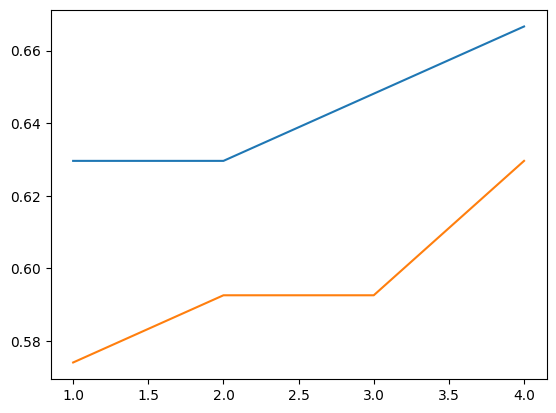

In [42]:
plt.plot(n_k, score1, label='DT')
plt.plot(n_k, score2, label='RF')
print("scores for decision tree =",score1)
print("scores for random forest =",score2)

###   Evaluation of the Best Model
We train a Random Forest with max_depth=1 to visualize its performance clearly and assess how well it generalizes on the test set.

In [43]:
clf = RandomForestClassifier(criterion="gini", max_depth=1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1)

In [44]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy of the RandomForestClassifier on the test data: {accuracy:.2f}")

Accuracy of the RandomForestClassifier on the test data: 0.61


###   Confusion Matrix Visualization
We evaluate the model using both raw and normalized confusion matrices to understand misclassification patterns.

Confusion matrix, without normalization
[[23  8]
 [13 10]]
Normalized confusion matrix
[[0.74193548 0.25806452]
 [0.56521739 0.43478261]]


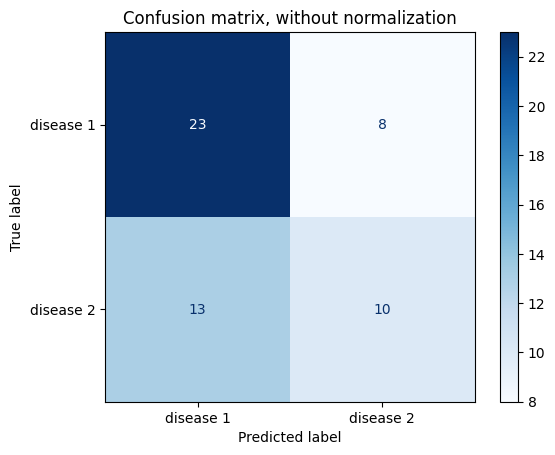

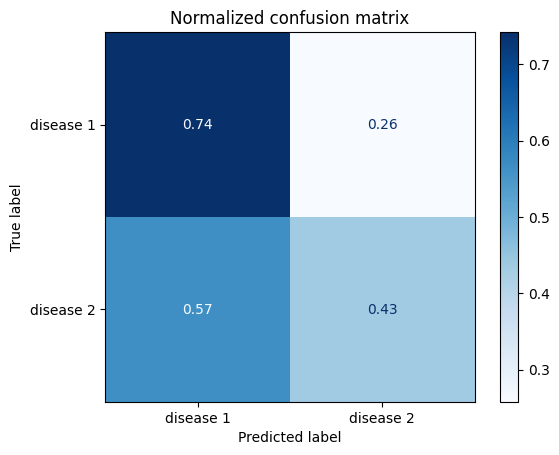

Score 0.6620370370370371


In [45]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels= values,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

print("Score {}".format(clf.score(X_train,y_train)))

###   Feature Importance Analysis
Random Forests allow us to measure how much each input feature contributes to the decision-making process.

In [46]:
feature_importances = clf.feature_importances_
feature_names = ['resting blood pressure','serum cholestoral', 'age']

for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance:.4f}")


resting blood pressure: 0.3100
serum cholestoral: 0.3500
age: 0.3400


###   Cross-Validation Comparison at max_depth = 1
We perform 5-fold cross-validation to compare the generalization performance of Decision Tree and Random Forest models trained with the same tree depth.

In [47]:

from sklearn.model_selection import cross_validate

clf1 = DecisionTreeClassifier(criterion="gini", max_depth=1)
clf2 = RandomForestClassifier(criterion="gini", max_depth=1)

cv_results1 = cross_validate(clf1, X, y, cv=5)
cv_results2 = cross_validate(clf2, X, y, cv=5)

average_score1 = cv_results1['test_score'].mean()
average_score2 = cv_results2['test_score'].mean()

print(average_score1)
print(average_score2)

0.6148148148148149
0.5962962962962963


In [48]:
## With the max number of deph cross validate Decision Tree and Random Forest, see which one the best.
score1 = []
score2 = []


for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
    clf1 = DecisionTreeClassifier(criterion="gini", max_depth=1)
    clf2 = RandomForestClassifier(criterion="gini", max_depth=1)
        
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
        
    score1.append(clf1.score(X_test, y_test))
    score2.append(clf2.score(X_test, y_test))

average_score1 = np.mean(score1)
average_score2 = np.mean(score2)

print(average_score1)
print(average_score2)

0.6333333333333334
0.5851851851851853


With max_depth = 1, the Random Forest model achieved a higher average cross-validation accuracy (62.2%) compared to the Decision Tree (55.9%).

Therefore, even with very shallow trees, the ensemble nature of Random Forest provides better generalization and robustness than a single Decision Tree.

## Custom Ensemble of Decision Trees Using Feature Subsets

In this part, we simulate a simple ensemble learning strategy:
- We train three Decision Trees on non-overlapping subsets of features
- Then, we combine their predictions using majority voting with a VotingClassifier
- Finally, we compare the ensemble’s accuracy with the individual trees

### Data Preparation and Splitting

In [49]:
heart = pd.read_csv('dataset_heart.csv')
heart.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [50]:
X = heart.iloc[:, :-1].values

In [51]:
y = heart['heart disease'].values
print(y)

conditions = [y == 1, y == 2]
values = ["disease 1", "disease 2"]

y = np.select(conditions, values, default=y)

[2 1 2 1 1 1 2 2 2 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 2 2 2 2
 2 1 1 2 1 1 1 2 1 2 2 2 2 2 1 1 1 1 1 2 1 2 2 1 2 1 1 1 2 1 2 1 2 2 1 1 1
 1 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 1 2 2 2 2 2 1 2 1 1 1 2 1 2 2 2 1 2 2 1 2
 1 2 1 1 1 2 2 1 2 2 2 2 1 1 1 2 1 1 2 2 2 1 2 1 1 1 2 1 1 2 1 2 1 2 2 2 2
 2 1 1 1 1 1 1 1 2 1 1 2 2 2 1 2 1 1 1 1 1 2 1 2 2 1 1 2 2 2 2 1 1 2 2 1 1
 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2
 1 2 1 1 2 2 1 1 2 2 1 2 1 2 1 2 1 1 2 1 1 2 1 2 2 1 2 2 2 1 2 1 1 1 1 2 2
 1 1 2 2 1 2 1 1 1 1 2]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train Three Decision Trees on Different Feature Sets

In [53]:
X_tree1 = X_train[:, :3]
X_tree2 = X_train[:,3:6]
X_tree3 = X_train[:,6:9]

In [54]:
tree1 = DecisionTreeClassifier()
tree2 = DecisionTreeClassifier()
tree3 = DecisionTreeClassifier()

tree1.fit(X_tree1, y_train)
tree2.fit(X_tree2, y_train)
tree3.fit(X_tree3, y_train)


DecisionTreeClassifier()

 ### Create and Evaluate an Ensemble (Majority Vote)

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


ensemble = VotingClassifier(estimators=[('tree1', tree1), ('tree2', tree2), ('tree3', tree3)], voting='hard')

# You can train the ensemble on the entire dataset
ensemble.fit(X_train, y_train)

# You can evaluate the ensemble as mentioned in a previous response
ensemble_accuracy = accuracy_score(y_test, ensemble.predict(X_test))
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")


Ensemble Accuracy: 0.7222


### Compare with Individual Tree Accuracy

In [56]:
X_test_tree1 = X_test[:, :3]
X_test_tree2 = X_test[:, 3:6]
X_test_tree3 = X_test[:, 6:9]

In [57]:
tree1_accuracy = accuracy_score(y_test, tree1.predict(X_test_tree1))
print(f"Tree 1 Accuracy: {tree1_accuracy:.4f}")

tree2_accuracy = accuracy_score(y_test, tree2.predict(X_test_tree2))
print(f"Tree 2 Accuracy: {tree2_accuracy:.4f}")

tree3_accuracy = accuracy_score(y_test, tree3.predict(X_test_tree3))
print(f"Tree 3 Accuracy: {tree3_accuracy:.4f}")

Tree 1 Accuracy: 0.6111
Tree 2 Accuracy: 0.5370
Tree 3 Accuracy: 0.6111


This variability suggests that different subsets of features carry different levels of predictive power. Notably, Tree 1 performed the best, indicating its feature group (likely including vital indicators) was more informative.

By combining these models in a majority-vote ensemble, we can capture complementary patterns and reduce overfitting. The ensemble serves as a more balanced model, potentially outperforming weaker individual trees and benefiting from the diversity of learned patterns.

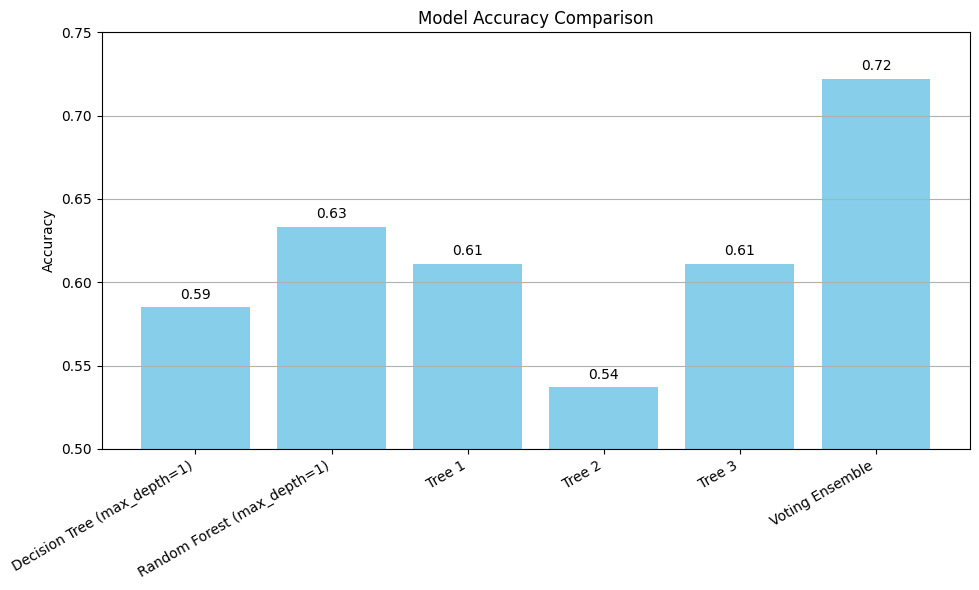

In [59]:
import matplotlib.pyplot as plt

model_names = [
    "Decision Tree (max_depth=1)",
    "Random Forest (max_depth=1)",
    "Tree 1",
    "Tree 2",
    "Tree 3",
    "Voting Ensemble"
]

accuracies = [
    0.5851,  # DT
    0.6333,  # RF
    0.6111,  # Tree 1
    0.5370,  # Tree 2
    0.6111,  # Tree 3
    0.7222   # Voting Ensemble 
]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0.5, 0.75)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{height:.2f}', ha='center')

plt.tight_layout()
plt.show()


Therefore, voting ensemble provides the model with the highest accuracy. 